In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the Dataset
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [7]:
#Check for missing values
df.isnull().sum()  # isnull() is the same as isna()


Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [8]:
df = df.dropna()
print(df.isnull().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [12]:
df.shape

(18634, 3)

In [11]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


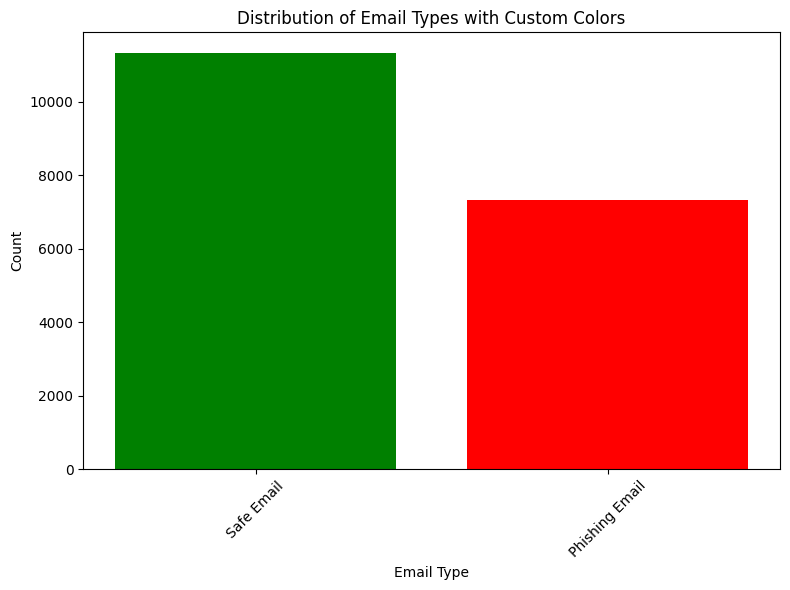

In [13]:
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [14]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [15]:
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [16]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,15986,revised - transitional steering committee meet...,Safe Email
1,11298,re : country risk jr . economist hiring vince ...,Safe Email
2,118,re : txu fuel for december here ' s the sheet ...,Safe Email
3,8870,"On Fri, 19 Jul 2002 23:38:09 +0100\nBrian Fost...",Safe Email
4,18470,acm sac ' 99 - track on coordination prelimina...,Safe Email


In [17]:
X = Data["Email Text"].values
y = Data["Email Type"].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [20]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
accuracy_score(y_test,y_pred)

0.9314038286235187

In [24]:
confusion_matrix(y_test,y_pred)

array([[2119,   79],
       [ 222, 1968]], dtype=int64)

In [25]:
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.91      0.96      0.93      2198\n    Safe Email       0.96      0.90      0.93      2190\n\n      accuracy                           0.93      4388\n     macro avg       0.93      0.93      0.93      4388\n  weighted avg       0.93      0.93      0.93      4388\n'

In [26]:
from sklearn.svm import SVC

#Create the Pipeline
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [27]:
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [28]:
s_ypred = SVM.predict(x_test)

In [29]:
# check the SVM model accuracy
accuracy_score(y_test,s_ypred )

0.4990884229717411